In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import missingno as msno

# 1) Data Understanding 

In [2]:
dataframe = pd.read_csv("Mall_Customers.csv")


## 1.1) Data inspection first 5 rows 

In [3]:
print(dataframe.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## 1.2) Data inspection last 5 rows 

In [4]:
print(dataframe.tail())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


## 1.3) Columns of the dataframe

In [5]:
dataframe.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 1.4) Information on each columns of the dataframe 


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### There are total of 5 columns and 200 rows in the dataframe. The datatype of CustomerID, Age, Annual Income and Spending score is integer whereas, data type of gender column in object. 
##### Customer ID column stores the unique ID of the customer
##### Gender column stores the sex of the customer
##### Age column stores the age of the customer 
##### Annual Income stores the income amount of the customer where 'k' denotes multiple of thousand
##### Spending score stores the Spending score of the customer out of 100 

## 1.5) Statistical Description 

In [7]:
dataframe[['Age','Annual Income (k$)','Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


##### The overall summary statistic of the each numerical column is shown with their total count row entries, mean , standard deviation, minimun and maximum values of each numerical column, and 1st,2nd, and 3rd quartile values.

In [8]:
dataframe[['Age','Annual Income (k$)','Spending Score (1-100)']].var()

Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64

##### Annual Income column has the highest variance compare to other column which indicates us that the data is spreadness is large around the central tendency metric mean
##### Whereas age column has low variance which indicates us that the data is nearer to mean or concentrated towards the mean.  

## 1.6) Skewness 

In [9]:
dataframe[['Age','Annual Income (k$)','Spending Score (1-100)']].skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

### 1.6.1) Spending score column 

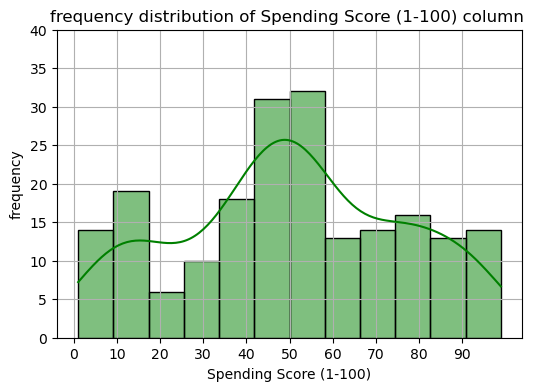

In [10]:
# calculating the desire number of bins for the histogram 
binss = dataframe['Spending Score (1-100)'].max() - dataframe['Spending Score (1-100)'].min()
# fiugure size 
plt.figure(figsize=(6, 4))
# plotting histogram for work_year columm 
sns.histplot(dataframe['Spending Score (1-100)'], bins="rice", kde=True,color='GREEN')
# x axis  ticks values 
plt.xticks(range(0,100,10))
# y axis ticks value 
plt.yticks(range(0,45,5))
# title of the plot 
plt.title("frequency distribution of Spending Score (1-100) column " )
# name of the xlabel 
plt.xlabel('Spending Score (1-100)')
# name of the y label 
plt.ylabel("frequency")
# include grid in the histogram 
plt.grid()
plt.savefig("hist.png")
plt.show()

#### Spending score column is  slighly negatively skewed/ left skewed, the data is relatively symmetrical/ normally distributed.
#### Most of the customer have higher spending score, while few  customer  have lower spending score as they rarely vists  the department store 






### 1.6.2) Age column 

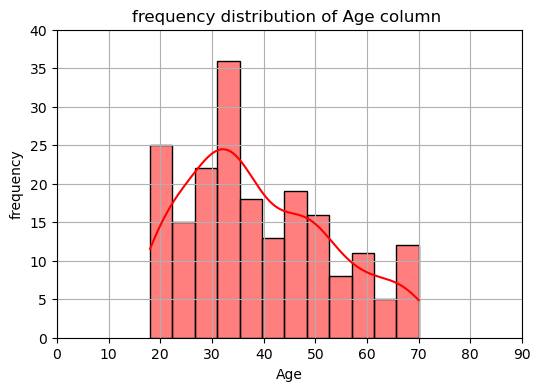

In [11]:
# calculating the desire number of bins for the histogram 
# fiugure size 
plt.figure(figsize=(6, 4))
# plotting histogram for work_year columm 
sns.histplot(dataframe['Age'], bins='rice', kde=True,color='red')
# x axis  ticks values 
plt.xticks(range(0,100,10))
# y axis ticks value 
plt.yticks(range(0,45,5))
# title of the plot 
plt.title("frequency distribution of Age column " )
# name of the xlabel 
plt.xlabel('Age')
# name of the y label 
plt.ylabel("frequency")
# include grid in the histogram 
plt.grid()
plt.show()

#### Data is Right skewed which means that most of the data is concentrated towards the left side with in range of 20 to 55 years.  Age group of 30 to 35 have the highest number of people in the data set. 

### 1.6.3) Annual Income column 

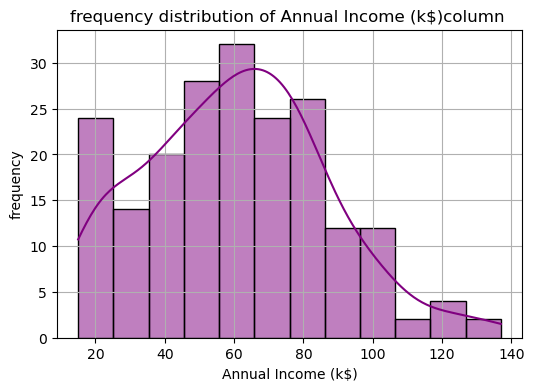

In [12]:
# calculating the desire number of bins for the histogram 

# fiugure size 
plt.figure(figsize=(6, 4))
# plotting histogram for work_year columm 
sns.histplot(dataframe['Annual Income (k$)'], bins="rice", kde=True,color='purple')
# title of the plot 
plt.title("frequency distribution of Annual Income (k$)column " )
# name of the xlabel 
plt.xlabel('Annual Income (k$)')
# name of the y label 
plt.ylabel("frequency")
# include grid in the histogram 
plt.grid()
plt.savefig("hist.png")
plt.show()

#### The data is right skewed which indicates us that data is concentrated toward the right side, with in the range of 15-115k dollar. Small portion of the people are earning high income around 130k-140k. While majority of the people are earning around 15k-115k.

##

## 1.7) Total number of female and male in the data set

In [13]:
gender = dataframe[['Gender']].value_counts().reset_index()
gender.columns = ['Gender', 'Count']
print(gender)

   Gender  Count
0  Female    112
1    Male     88


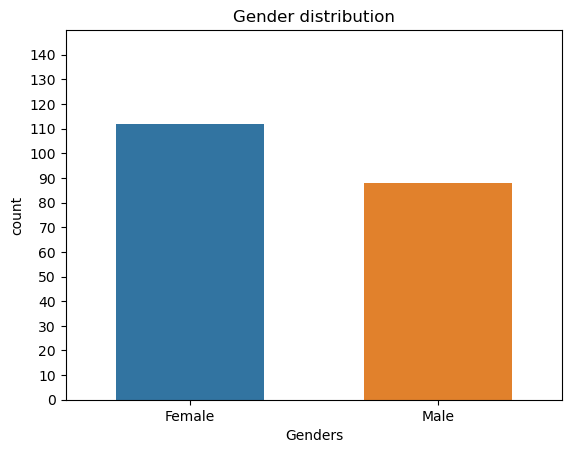

In [14]:
sns.barplot(data =gender,x = 'Gender' ,y='Count',width=0.6)
plt.title("Gender distribution")
plt.xlabel("Genders")
plt.ylabel("count")
plt.ylim(0,150)
plt.yticks(np.arange(0,150,10))
plt.show()

#### There are total of 112 female and 88 male data in a data frame. 

## 1.8)  Missing values 


In [15]:
dataframe.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### No missing values in the data set 

<Axes: >

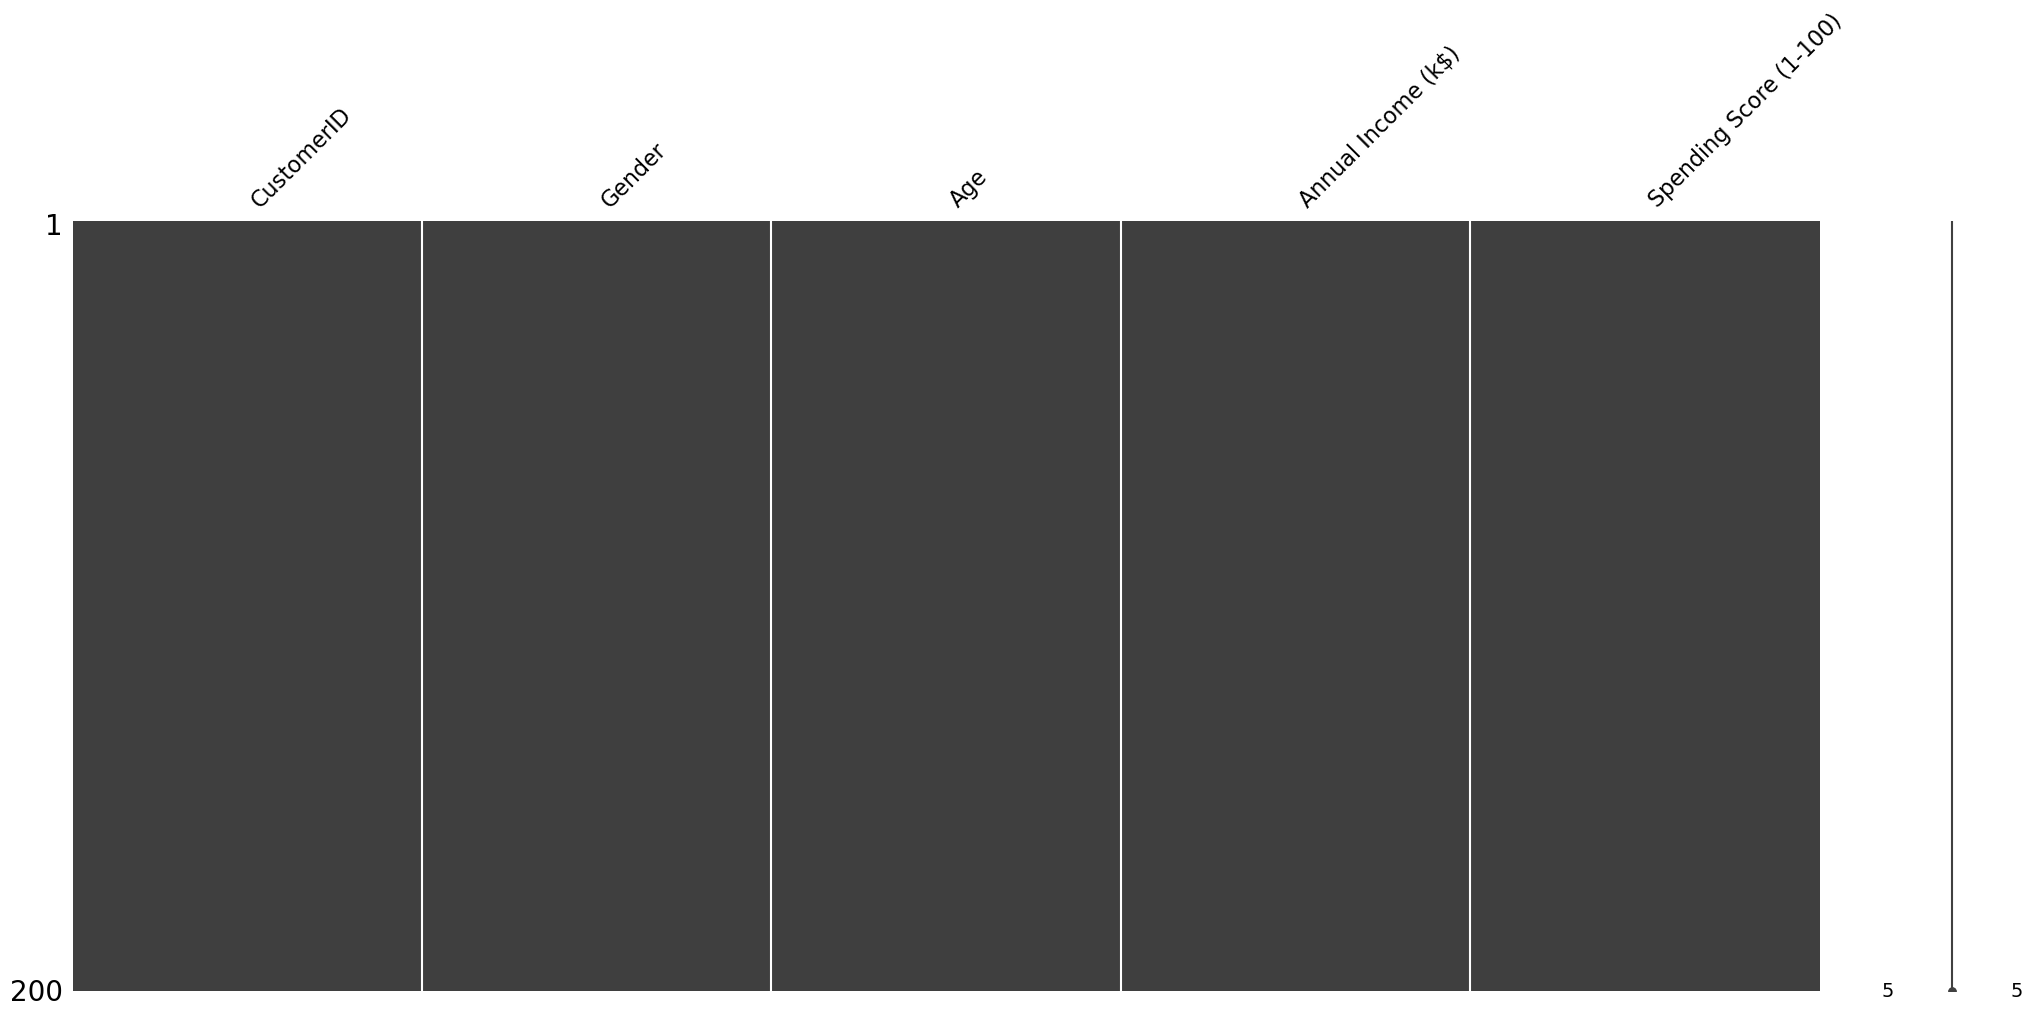

In [16]:

msno.matrix(dataframe)

## 1.9) Duplicate values 

In [17]:
dataframe.duplicated().any()

False

#### All the row entry are unique, no duplicates data 

## 1.10) Correlation between two features 

In [18]:

dataframe_corr = dataframe[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()
print(dataframe_corr)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


<Axes: >

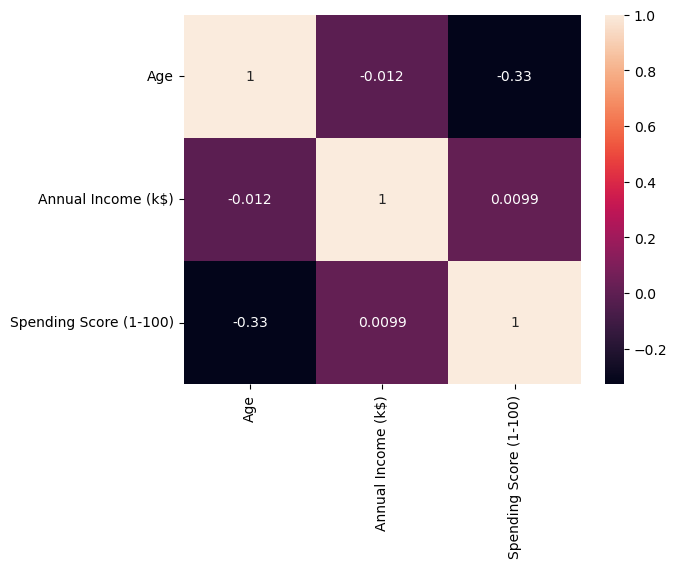

In [19]:
sns.heatmap(dataframe_corr,annot = True)

### 1.10.1) Age vs spending score 

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

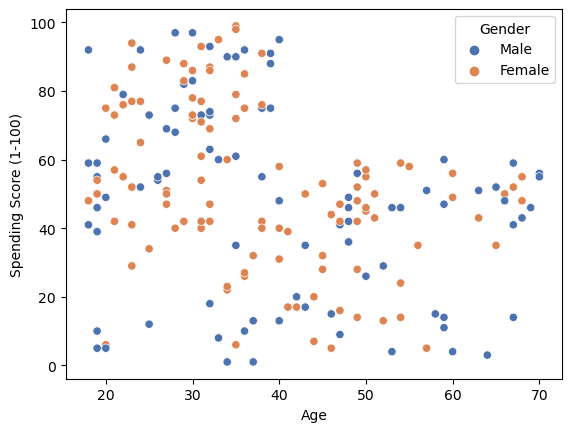

In [20]:
sns.scatterplot(data = dataframe, x = "Age",y="Spending Score (1-100)",palette="deep",hue="Gender")

#### There is negative correlation between Age and Spending score of the customer. It indicates that the higher the age of the customer the less is the  spending score and vice-versa.

### 1.10.2 Age Vs Annual Income 

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

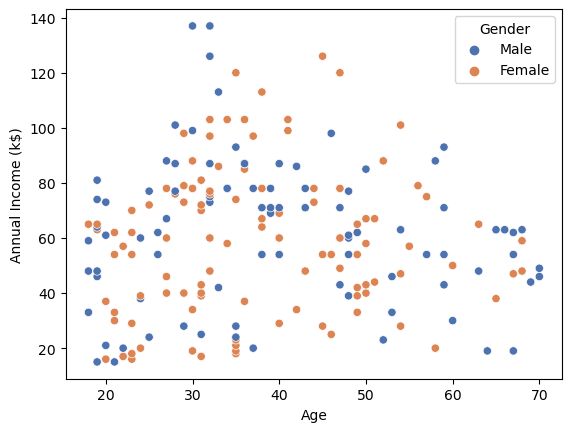

In [21]:
sns.scatterplot(data = dataframe, x = "Age",y="Annual Income (k$)",palette="deep",hue="Gender")

## 1.10.3 Annual income VS Spending Scores 

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

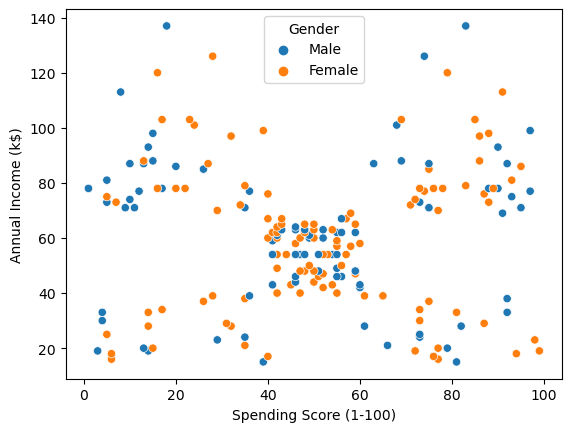

In [22]:
sns.scatterplot(data = dataframe, x = "Spending Score (1-100)",y="Annual Income (k$)",hue="Gender")

### 1.11) Outlier detection 

#### 1.11.1) For Age column 

(0.0, 90.0)

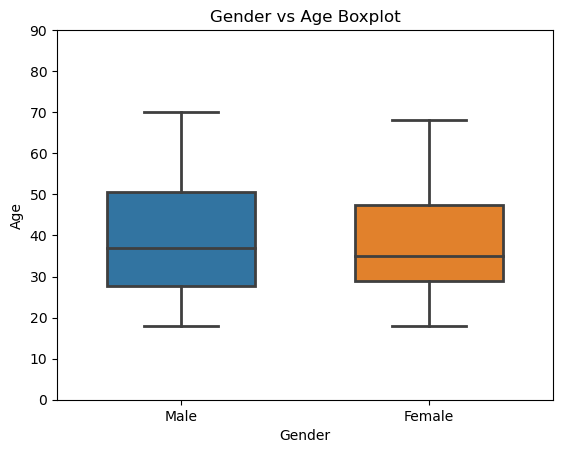

In [23]:
sns.boxplot( x='Gender',y='Age', data=dataframe,showfliers=True,orient='v',width = 0.6, linewidth = 2   )
plt.title("Gender vs Age Boxplot" )
plt.ylim(0, 90)


In [24]:
from scipy import stats

z_scores = stats.zscore(dataframe['Age'], axis=None)
outliers = dataframe[z_scores > 3]
print(outliers)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


#### As per the calculation of z-score for each value of the Age of the customer and filtering the data the outlier was not found in this column 

### 1.11.2) For Annual income columns 

(0.0, 160.0)

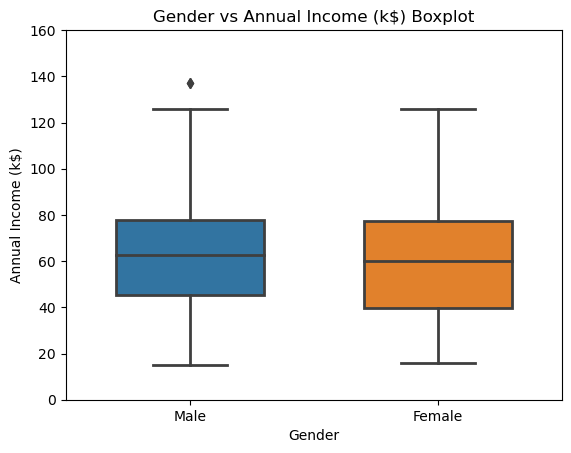

In [25]:
sns.boxplot( x='Gender',y='Annual Income (k$)', data=dataframe,showfliers=True,orient='v',width = 0.6, linewidth = 2   )
plt.title("Gender vs Annual Income (k$) Boxplot" )
plt.ylim(0, 160)


In [26]:
from scipy import stats

z_scores = stats.zscore(dataframe['Annual Income (k$)'], axis=None)
outliers = dataframe[z_scores > 3 ]
print(outliers)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

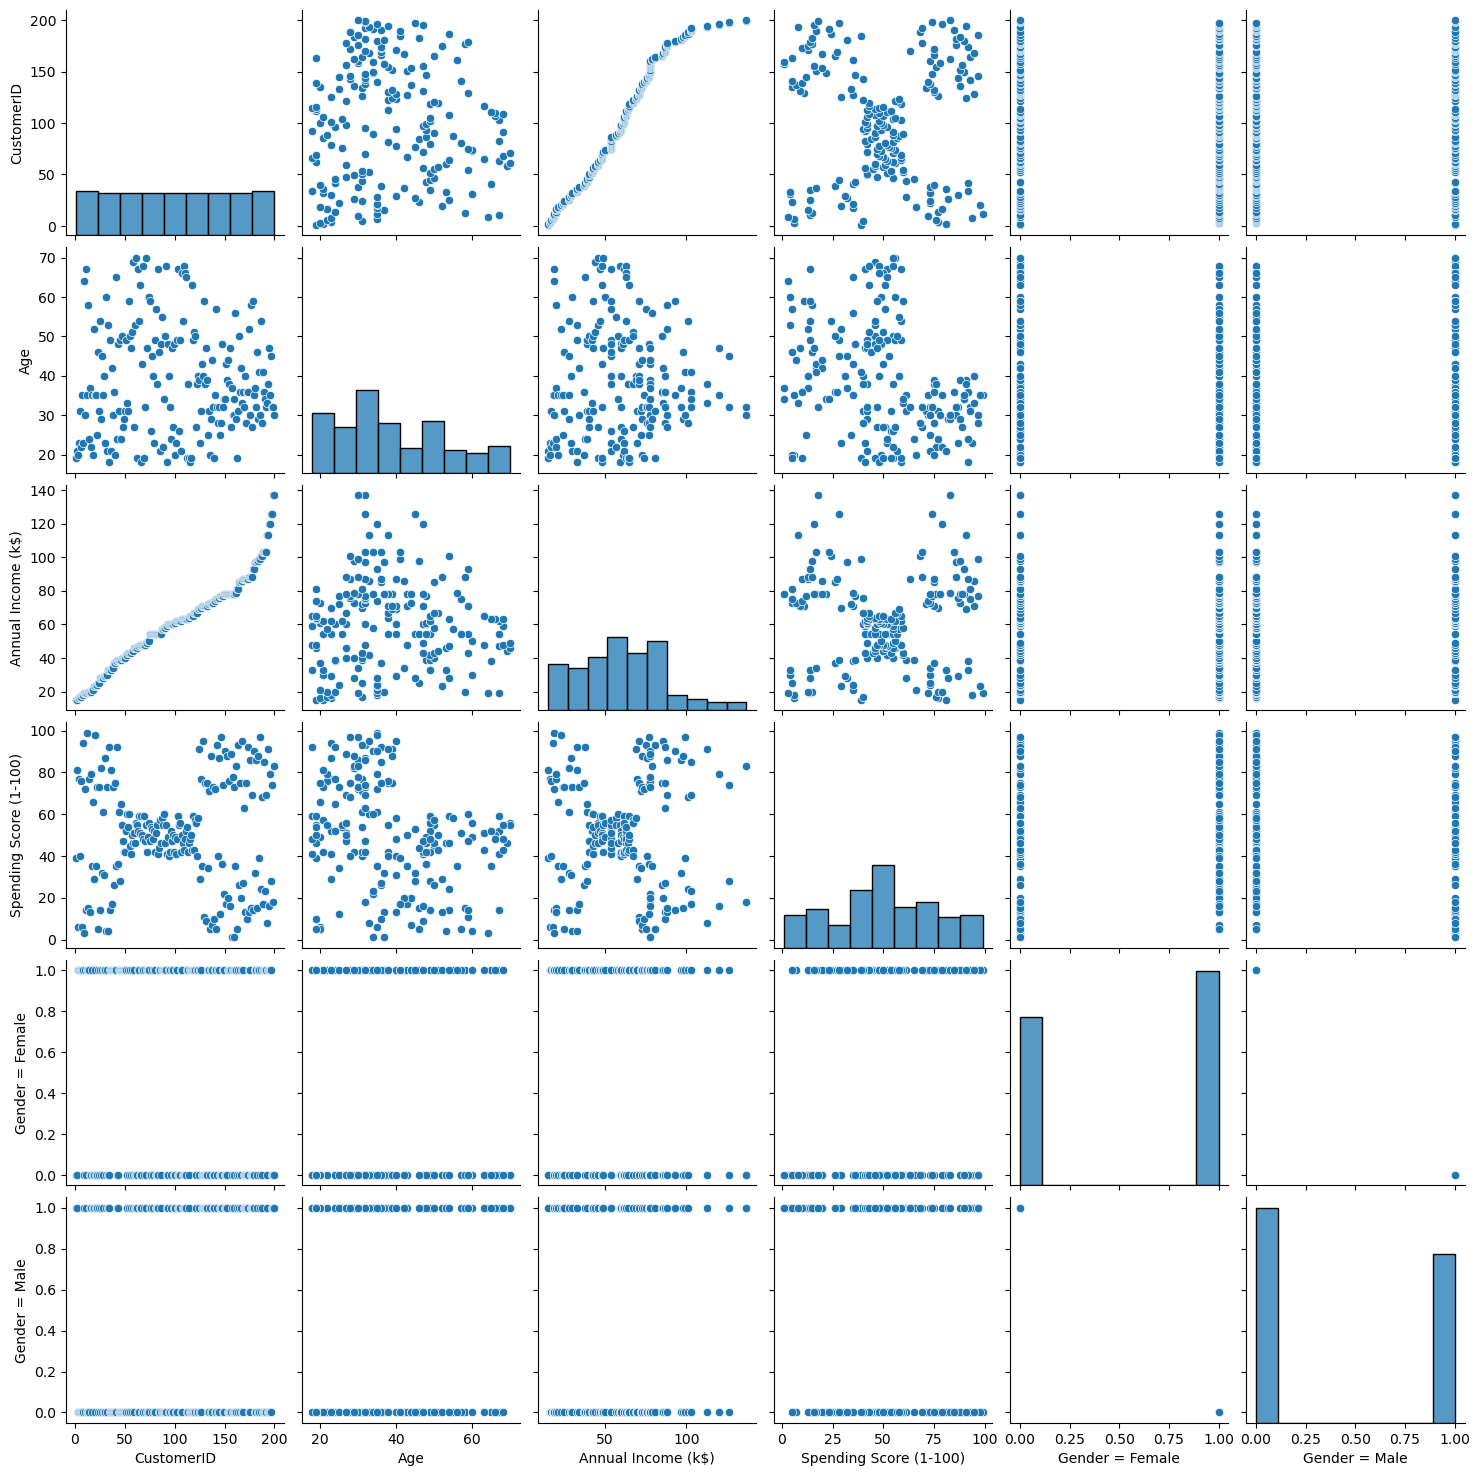

In [33]:
plt.figure(figsize=(8,6))
sns.pairplot(dataframe)
plt.show()

# 2) Data Preparation 

### 2.1 ) One hot encoding 

In [28]:
dataframe =  pd.get_dummies(dataframe, columns = ['Gender'],prefix_sep=" = ", dtype=int)
print(dataframe)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender = Female  Gender = Male  
0                  0              1  
1                  0              1  
2                  1              0  
3                  1           

In [29]:
## 2.3) Removing records with the 

In [30]:

string_in_column = dataframe['Annual Income (k$)'].apply(lambda x: isinstance(x, str))
dataframe = dataframe[~string_in_column]


## 2.2 ) Feature Scaling 

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataframe[['Annual Income (k$)','Spending Score (1-100)','Gender = Male']])
new_dataframe_male = pd.DataFrame(X_scaled,columns=['Annual Income','Spending Score','Gender_Is_Male'])
print(new_dataframe_male)

     Annual Income  Spending Score  Gender_Is_Male
0        -1.738999       -0.434801        1.128152
1        -1.738999        1.195704        1.128152
2        -1.700830       -1.715913       -0.886405
3        -1.700830        1.040418       -0.886405
4        -1.662660       -0.395980       -0.886405
..             ...             ...             ...
195       2.268791        1.118061       -0.886405
196       2.497807       -0.861839       -0.886405
197       2.497807        0.923953        1.128152
198       2.917671       -1.250054        1.128152
199       2.917671        1.273347        1.128152

[200 rows x 3 columns]


In [32]:

# wcss = []  # within-cluster sum of squares
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
#     kmeans.fit(new_dataframe_male)
#     wcss.append(kmeans.inertia_)

# # Plot the Elbow graph
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, 11), wcss, marker='o', linestyle=':')
# plt.title('Elbow Method for determing the ideal number of cluster')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.axhline(y=230, color='r', linestyle='--')
# plt.show()



